In [2]:
#Importamos las librerias necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import math as math
import plotly.graph_objects as go
import missingno as msno
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

Cargando datasets

In [3]:
df = pd.read_excel('bike_train.xlsx')
df_test = pd.read_excel('bike_test.xlsx')

In [4]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,11995,2012-05-19,2,1,5,23,0,6,0,1,0.60,0.6212,0.56,0.1642,71,168,239
11995,11996,2012-05-20,2,1,5,0,0,0,0,1,0.58,0.5455,0.53,0.1045,42,128,170
11996,11997,2012-05-20,2,1,5,1,0,0,0,1,0.56,0.5303,0.52,0.0000,28,102,130
11997,11998,2012-05-20,2,1,5,2,0,0,0,1,0.56,0.5303,0.52,0.0000,36,62,98


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

Valores nulos

In [6]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<AxesSubplot:>

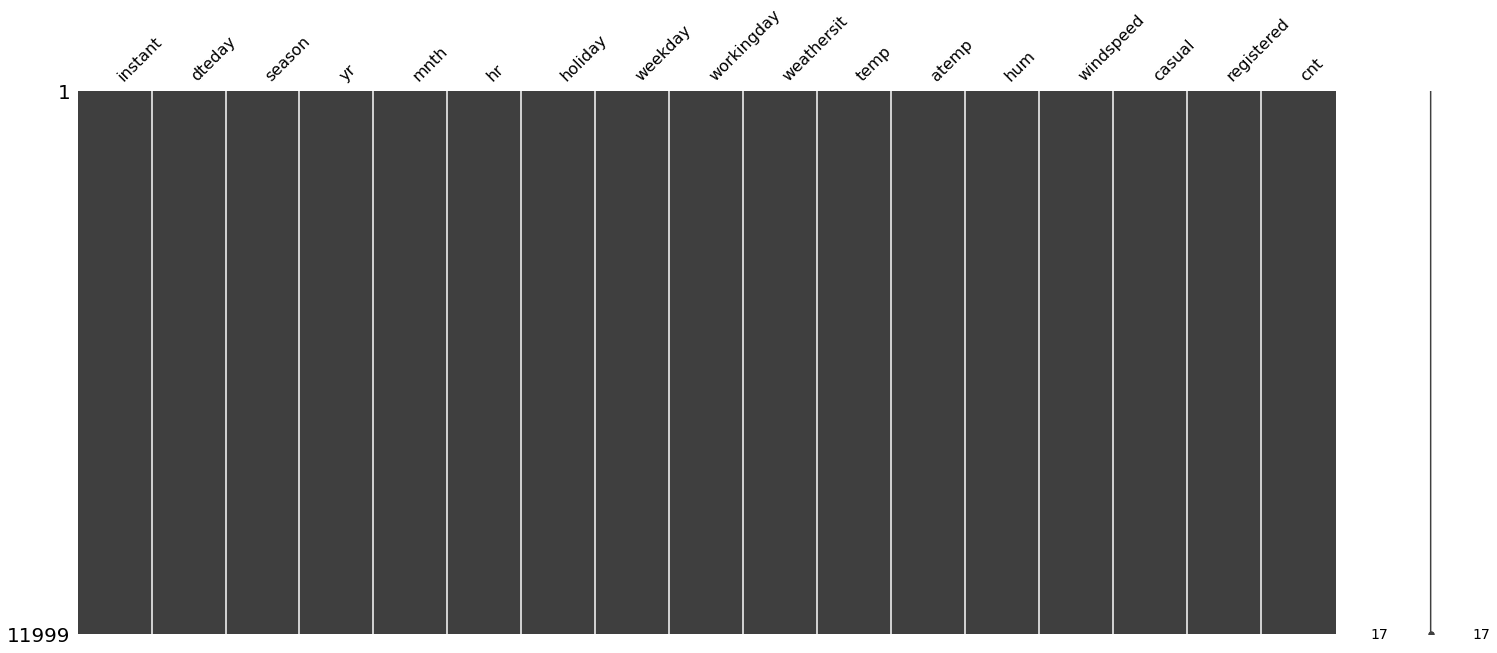

In [7]:
#Para visualizar calidad de los dato de entrenamiento
msno.matrix(df)

In [8]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,6000.000000,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,0.465704,0.448888,0.625770,0.196433,30.049837,128.545129,158.594966
std,3463.957275,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,0.188576,0.169633,0.200637,0.125394,43.596915,124.692750,151.392952
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3000.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.303000,0.470000,0.104500,3.000000,29.000000,34.000000
50%,6000.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.620000,0.194000,13.000000,98.000000,118.000000
75%,8999.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.590900,0.790000,0.283600,39.000000,185.000000,232.000000
max,11999.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,367.000000,770.000000,957.000000


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     5380 non-null   int64         
 1   dteday      5380 non-null   datetime64[ns]
 2   season      5380 non-null   int64         
 3   yr          5380 non-null   int64         
 4   mnth        5380 non-null   int64         
 5   hr          5380 non-null   int64         
 6   holiday     5380 non-null   int64         
 7   weekday     5380 non-null   int64         
 8   workingday  5380 non-null   int64         
 9   weathersit  5380 non-null   int64         
 10  temp        5380 non-null   float64       
 11  atemp       5380 non-null   float64       
 12  hum         5380 non-null   float64       
 13  windspeed   5380 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 588.6 KB


In [10]:
df_test.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
dtype: int64

In [ ]:
sns.pairplot(df)

Error in callback <function flush_figures at 0x00000161CDD52E60> (for post_execute):


In [11]:
#dividimos los datos por año, mes y día
df_test['year'] = df_test['dteday'].apply(lambda x : x.year)
df_test['month'] = df_test['dteday'].apply(lambda x : x.month)
df_test['day'] = df_test['dteday'].apply(lambda x : x.day)

df['year'] = df['dteday'].apply(lambda x : x.year)
df['month'] = df['dteday'].apply(lambda x : x.month)
df['day'] = df['dteday'].apply(lambda x : x.day)

In [12]:
#Eliminamos las columnas normalizadas y las que no usaremos
df.drop(columns={'instant', 'dteday', 'yr', 'mnth', 'casual', 'registered'}, inplace=True)
df_test.drop(columns={'instant', 'dteday', 'yr', 'mnth'}, inplace=True)

In [13]:
# Correlación de las columnas
corr = df.corr()

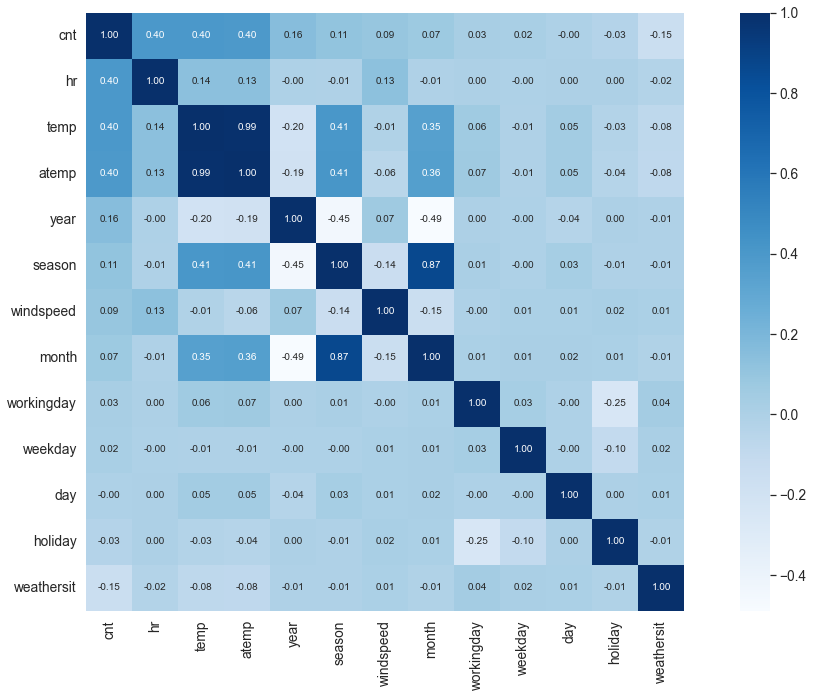

In [14]:
#corelation matrix.
plt.figure(figsize=(20,11))
k=13
cols = corr.nlargest(k, 'cnt')['cnt'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

Para el mapa de calor hemos coloreado las variavbles con mayor correlación de negro. Para la variable 'cnt' que es la queremos predecir, tiene una correlación
* Tiene una correlación media con la temperatura, la sensación termica y la hora.
* También tenga en cuenta que el clima y el conteo están muy inversamente relacionados. Esto se debe a que para nuestros datos, a medida que el clima aumenta de (1 a 4), implica que el clima está empeorando y, por lo tanto, menos personas alquilarán bicicletas.
la humedad está inversamente relacionada con el conteo como se esperaba ya que el clima es húmedo a la gente no le gustará viajar en bicicleta.
* Y casi no hay correlación con el resto de las variables



In [15]:
df

,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,day
0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16,2011,1,1
1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,2011,1,1
2,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32,2011,1,1
3,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13,2011,1,1
4,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,2,23,0,6,0,1,0.60,0.6212,0.56,0.1642,239,2012,5,19
11995,2,0,0,0,0,1,0.58,0.5455,0.53,0.1045,170,2012,5,20
11996,2,1,0,0,0,1,0.56,0.5303,0.52,0.0000,130,2012,5,20
11997,2,2,0,0,0,1,0.56,0.5303,0.52,0.0000,98,2012,5,20


In [16]:
#Ordenamos las variables por el grado de correlacion que tienen con el target
cor= df[:].corr()
cor=cor.sort_values(['cnt'],ascending=False)

In [17]:
cor.cnt.head(28)

cnt           1.000000
hr            0.396698
temp          0.395743
atemp         0.395234
year          0.156960
season        0.111369
windspeed     0.094791
month         0.073431
workingday    0.025132
weekday       0.022618
day          -0.001430
holiday      -0.030304
weathersit   -0.149848
hum          -0.303672
Name: cnt, dtype: float64

In [18]:
df.columns

Index(['season', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'year', 'month', 'day'],
      dtype='object')

Probamos el modelo random forest classifier


In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
#Creamos el dataframe de features que vamos a utilizar y el de target
df_features = df[['season','month','temp','windspeed','year','hr','weathersit','atemp']]

df_target = df['cnt']

In [21]:
#imputamos los valores medios de las variables numericas
df_features.fillna(df_features.mean(), inplace=True)
df_target.isnull().sum()

C:\Users\x\AppData\Local\Temp\ipykernel_880\4201223307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.fillna(df_features.mean(), inplace=True)


0

In [22]:
#creamos el dataframe de features que vamos a utilizar y el de target
X = df_features
y = df_target

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#creamos los grupos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
#instanciamos el modelo y lo entrenamos
clf = RandomForestClassifier(n_estimators=150, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150, n_jobs=-1, oob_score=True,
                       random_state=42)

In [27]:
#Evaluamos el desempeño del modelo
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9822700409152902
0.02351851851851852


In [28]:
print('Rendimiento', clf.score(X_train,y_train))

Rendimiento 0.9822700409152902


In [29]:
RMSLE = mean_squared_log_error(y_test, y_test_pred,squared=False)
print('Error cuadratico medio logaritmico: ', RMSLE) 

Error cuadratico medio logaritmico:  0.8144532011694852


In [30]:
#vamos a calcular el valor del error medio
RMSE = mean_squared_error(y_test, y_test_pred,squared=False)
print('Error cuadratico medio: RMSE', RMSE) 

Error cuadratico medio: RMSE 114.10195408460771


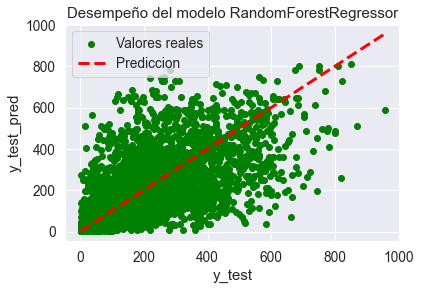

In [31]:
#graficamos el desempeño del modelo RandomForestRegressor 
plt.scatter(y_test, y_test_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=3,color='red')
plt.legend(['Valores reales', 'Prediccion'])
plt.title('Desempeño del modelo RandomForestRegressor')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()



Podemos ver que el accuracy_score es alto para el conjunto de entrenamiento pero bajo para el conjunto de testeo, eso podria indicar que el modelo esta en overfitting.

Probamos el modelo Random Forest Regressor

In [32]:
#creamos el dataframe de features que vamos a utilizar y el de target
X = df_features
y = df_target

In [33]:

#definimos los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#Instanciamos el modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
#entrenamos el modelo
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
model.predict(X_test)

array([101.43 ,   6.22 , 178.58 , ..., 322.65 , 228.765, 266.19 ])

In [36]:
#verivicamos el rendimiento del modelo
print('Rendimiento del modelo: ', model.score(X_test, y_test))

Rendimiento del modelo:  0.7442793848496785


In [37]:
#Predecimos los valores de con el conjunto de testeo y lo guardamos en una variable 
y_pred = model.predict(X_test)

In [38]:
#Calculamos e imprimimos el RMSLE
RMSLE = mean_squared_log_error(y_test, y_pred, squared=False)
print('Error cuadratico medio logaritmico: ', RMSLE) 

Error cuadratico medio logaritmico:  0.6412993528883728


In [39]:
#vamos a calcular el valor del error medio
mean_absolute_error(y_test, y_pred)

49.418056200396826

In [40]:
RMSE=mean_squared_error(y_test, y_pred, squared=False)
print('Error medio: ', RMSE) 

Error medio:  75.13336329211701


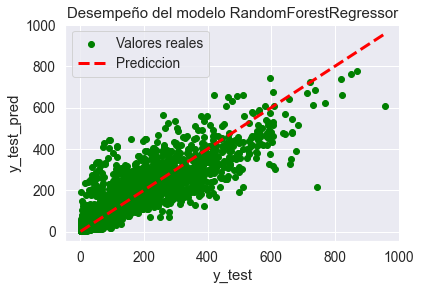

In [41]:
#graficamos el desempeño del modelo RandomForestRegressor 
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=3,color='red')
plt.legend(['Valores reales', 'Prediccion'])
plt.title('Desempeño del modelo RandomForestRegressor')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()


### Probamos otros modelos
* Ridge
* Lasso

In [42]:
train_target = df['cnt']
train_feature = df.drop(['cnt'], axis=1)
train_target.shape, train_feature.shape

((11999,), (11999, 13))

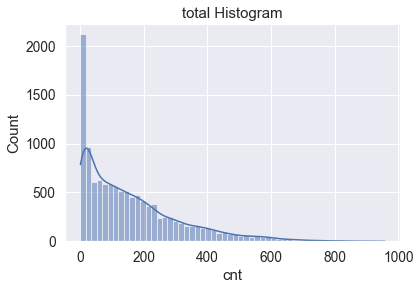

In [43]:
# train_target histogram 
plt.title('total Histogram')
sns.histplot(train_target, kde=True)
plt.show()

In [44]:
# train_target log transformation
train_target_log = np.log1p(train_target)


In [45]:
# Modelando los datos para el entrenamiento
train_featute_fin = pd.get_dummies(train_feature, columns=['season', 'hr'])
train_featute_fin.columns

Index(['holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed', 'year', 'month', 'day', 'season_1', 'season_2',
       'season_3', 'season_4', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5',
       'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23'],
      dtype='object')

In [46]:
test_fin = pd.get_dummies(df_test, columns=['season',  'hr'])
test_fin.columns

Index(['holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed', 'year', 'month', 'day', 'season_1', 'season_2',
       'season_3', 'season_4', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5',
       'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split 

X_train, X_validation, y_train, y_validation = train_test_split(train_featute_fin, train_target_log, test_size=0.3, random_state=2208)
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((8399, 39), (3600, 39), (8399,), (3600,))

In [48]:
from sklearn.linear_model import  Ridge , Lasso

In [49]:
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

In [50]:

ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)



Lasso(alpha=0.01)

In [51]:
Ridge()
Lasso()

Lasso()

In [52]:
pred = ridge_reg.predict(X_validation)

In [53]:
# función para hallar el error de registro de raíz cuadrática media
def rmsle(y, pred):  
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    print('RMSLE: {0:.3f}'.format(rmsle_val))

RMSLE Ridge

In [54]:
evaluate_regr(y_validation, pred)

RMSLE: 0.148


In [55]:
pred_lasso = lasso_reg.predict(X_validation)

RMSLE Lasso

In [57]:
evaluate_regr(y_validation, pred_lasso)

RMSLE: 0.159


In [58]:
test_fin

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,year,month,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,0,0,0,1,0.52,0.5000,0.68,0.0896,2012,5,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0.50,0.4848,0.72,0.1045,2012,5,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0.50,0.4848,0.63,0.1343,2012,5,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0.52,0.5000,0.68,0.1940,2012,5,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0.56,0.5303,0.56,0.1642,2012,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,0,1,1,2,0.26,0.2576,0.60,0.1642,2012,12,...,0,0,0,0,0,1,0,0,0,0
5376,0,1,1,2,0.26,0.2576,0.60,0.1642,2012,12,...,0,0,0,0,0,0,1,0,0,0
5377,0,1,1,1,0.26,0.2576,0.60,0.1642,2012,12,...,0,0,0,0,0,0,0,1,0,0
5378,0,1,1,1,0.26,0.2727,0.56,0.1343,2012,12,...,0,0,0,0,0,0,0,0,1,0


### Probamos el modelo

In [59]:
prediccion = ridge_reg.predict(test_fin)
prediccion[0:10]

array([2.46090993, 3.3288127 , 4.49086267, 5.39044088, 6.1419359 ,
       6.01663242, 5.73003626, 5.80567028, 6.01132995, 6.01881774])

In [60]:
#Volver a los valores originales cantidad
prediccion_cnt = np.expm1(prediccion)
prediccion_cnt[0:10]

array([ 10.71546696,  26.90519014,  88.19836169, 218.30004939,
       463.95280355, 409.19490438, 306.98043659, 331.17776963,
       407.02561223, 410.09229005])

In [61]:
prediccion_cnt = np.round(prediccion_cnt, 0)
prediccion_cnt

array([ 11.,  27.,  88., ..., 115.,  96.,  61.])

In [62]:
df = pd.DataFrame(prediccion_cnt)
df.rename(columns={0:'pred'}, inplace=True)

In [63]:
predic = pd.concat([df_test, df], axis=1)

In [64]:
predic

,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,year,month,day,pred
0,2,4,0,0,0,1,0.52,0.5000,0.68,0.0896,2012,5,20,11.0
1,2,5,0,0,0,1,0.50,0.4848,0.72,0.1045,2012,5,20,27.0
2,2,6,0,0,0,1,0.50,0.4848,0.63,0.1343,2012,5,20,88.0
3,2,7,0,0,0,1,0.52,0.5000,0.68,0.1940,2012,5,20,218.0
4,2,8,0,0,0,1,0.56,0.5303,0.56,0.1642,2012,5,20,464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,1,19,0,1,1,2,0.26,0.2576,0.60,0.1642,2012,12,31,155.0
5376,1,20,0,1,1,2,0.26,0.2576,0.60,0.1642,2012,12,31,118.0
5377,1,21,0,1,1,1,0.26,0.2576,0.60,0.1642,2012,12,31,115.0
5378,1,22,0,1,1,1,0.26,0.2727,0.56,0.1343,2012,12,31,96.0


In [65]:
'''Lo guardo en un data frame y convierto en csv'''
data = pd.DataFrame(predic)


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      5380 non-null   int64  
 1   hr          5380 non-null   int64  
 2   holiday     5380 non-null   int64  
 3   weekday     5380 non-null   int64  
 4   workingday  5380 non-null   int64  
 5   weathersit  5380 non-null   int64  
 6   temp        5380 non-null   float64
 7   atemp       5380 non-null   float64
 8   hum         5380 non-null   float64
 9   windspeed   5380 non-null   float64
 10  year        5380 non-null   int64  
 11  month       5380 non-null   int64  
 12  day         5380 non-null   int64  
 13  pred        5380 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 588.6 KB


In [67]:
data.to_csv('./agusm95.csv',index=False)